In [ ]:
!pip install datasets

In [ ]:
import numpy as np
import math
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
from datasets import load_dataset

In [ ]:
L, d_k, d_v = 4,8,8
q = np.random.randn(L, d_k)
k = np.random.randn(L, d_k)
v = np.random.randn(L, d_v)

In [ ]:
print(q, '\n')
print(k, '\n')
print(v, '\n')

[[ 0.96758812 -0.40146975  2.18849141 -2.06052671 -1.15993592 -0.05396872
   0.19751109 -0.80567312]
 [-1.15515322  1.15279764 -0.62522654 -0.54217194 -1.19944445  0.37086141
  -0.73540482 -0.73023423]
 [ 0.51305653 -0.90361321 -1.28030804  0.10329917  0.47429372 -0.54157
  -0.17756604  0.8624922 ]
 [ 0.39749731 -1.49535567 -0.78455581 -1.17296651  2.03817588 -0.34945947
   1.55562468  2.37512176]] 

[[-1.24458168  1.21412414 -0.62577755 -0.85658199  0.50415185 -0.61579608
   0.20804076  0.82455895]
 [-1.65576569  0.51017098  0.78565181  0.39557238 -1.11090295  0.35500472
   1.32848951 -1.60721435]
 [-0.91639866  0.05486944 -0.06290943  0.12033662 -0.73808194  1.76629215
   0.23217683  0.20803954]
 [-2.48537524  1.98691324  0.36446368  0.96925111 -0.3866674  -1.06743508
  -0.87364681 -0.3305322 ]] 

[[ 0.95096576 -1.90498352  0.62781283 -0.26736013 -0.29318037  0.20819307
  -1.0450522  -0.42213853]
 [-1.72952972 -0.18825185 -1.14388353  0.23565835 -0.75810006 -0.2512609
  -0.098343   -

# self attention

In [ ]:
np.matmul(q,k.T)

array([[-2.47096003,  1.92408525, -0.65530959, -3.80218381],
       [ 2.10479696,  3.45589764,  2.31360005,  5.35989059],
       [ 0.22391188, -4.61677131, -1.59520365, -3.17229652],
       [ 2.71024127, -6.64040441, -1.80439928, -7.94110479]])

In [ ]:
scaled = np.matmul(q,k.T) / math.sqrt(d_k)
q.var(), k.var(), scaled.var()

(1.2073969672027554, 1.022938702053252, 1.668318358729655)

In [ ]:
scaled

array([[-0.8736163 ,  0.68026687, -0.23168693, -1.34427498],
       [ 0.7441581 ,  1.22184433,  0.81798114,  1.89500749],
       [ 0.0791648 , -1.63227515, -0.56398966, -1.12157619],
       [ 0.95821499, -2.34773749, -0.63795148, -2.80760452]])

# masking

In [ ]:
mask = np.tril(np.ones( (L,L) ))
mask

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [ ]:
mask[mask == 0] = -np.infty
mask[mask == 1] = 0
mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [ ]:
scaled + mask

array([[-0.8736163 ,        -inf,        -inf,        -inf],
       [ 0.7441581 ,  1.22184433,        -inf,        -inf],
       [ 0.0791648 , -1.63227515, -0.56398966,        -inf],
       [ 0.95821499, -2.34773749, -0.63795148, -2.80760452]])

# softmax

In [ ]:
def softmax(x):
  return (np.exp(x).T/ np.sum(np.exp(x), axis=-1)).T

In [ ]:
attention = softmax(scaled + mask)

In [ ]:
attention

array([[1.        , 0.        , 0.        , 0.        ],
       [0.38279864, 0.61720136, 0.        , 0.        ],
       [0.58608496, 0.10585019, 0.30806485, 0.        ],
       [0.79208869, 0.02904136, 0.16053418, 0.01833577]])

In [ ]:
new_v = np.matmul(attention,v)
new_v

array([[ 0.95096576, -1.90498352,  0.62781283, -0.26736013, -0.29318037,
         0.20819307, -1.0450522 , -0.42213853],
       [-0.7034397 , -0.84541439, -0.46568058,  0.04310356, -0.58012944,
        -0.07538255, -0.46074199, -0.68820018],
       [ 0.4205155 , -0.99284104, -0.46615445,  0.2460001 , -0.45150473,
         0.14510603, -0.16934518, -0.7859814 ],
       [ 0.73038249, -1.43107206,  0.12387611,  0.00247699, -0.35378209,
         0.16707358, -0.57110413, -0.59334345]])

In [ ]:
v

array([[ 0.95096576, -1.90498352,  0.62781283, -0.26736013, -0.29318037,
         0.20819307, -1.0450522 , -0.42213853],
       [-1.72952972, -0.18825185, -1.14388353,  0.23565835, -0.75810006,
        -0.2512609 , -0.098343  , -0.85321607],
       [ 0.15009768,  0.46603061, -2.31453159,  1.22620733, -0.64736723,
         0.16127519,  1.47226738, -1.45508088],
       [ 0.17808605,  0.46341608,  1.71108367,  0.57580887,  0.23907297,
        -0.89590027,  1.26401385, -0.03291496]])

In [ ]:
def scaled_dot_product_attention(q,k,v,mask=None):
  d_k = q.shape[-1]
  scaled = np.matmul(q,k.T) / math.sqrt(d_k)
  if mask is not None:
    scaled = scaled + mask
  attention = softmax(scaled)
  out = np.matmul(attention,v)
  return out, attention

In [ ]:
values, attention = scaled_dot_product_attention(q,k,v,mask=mask)
print('Q\n', q)
print('K\n', k)
print('V\n', v)
print('New V\n', values)
print('Attention\n', attention)

Q
 [[ 0.96758812 -0.40146975  2.18849141 -2.06052671 -1.15993592 -0.05396872
   0.19751109 -0.80567312]
 [-1.15515322  1.15279764 -0.62522654 -0.54217194 -1.19944445  0.37086141
  -0.73540482 -0.73023423]
 [ 0.51305653 -0.90361321 -1.28030804  0.10329917  0.47429372 -0.54157
  -0.17756604  0.8624922 ]
 [ 0.39749731 -1.49535567 -0.78455581 -1.17296651  2.03817588 -0.34945947
   1.55562468  2.37512176]]
K
 [[-1.24458168  1.21412414 -0.62577755 -0.85658199  0.50415185 -0.61579608
   0.20804076  0.82455895]
 [-1.65576569  0.51017098  0.78565181  0.39557238 -1.11090295  0.35500472
   1.32848951 -1.60721435]
 [-0.91639866  0.05486944 -0.06290943  0.12033662 -0.73808194  1.76629215
   0.23217683  0.20803954]
 [-2.48537524  1.98691324  0.36446368  0.96925111 -0.3866674  -1.06743508
  -0.87364681 -0.3305322 ]]
V
 [[ 0.95096576 -1.90498352  0.62781283 -0.26736013 -0.29318037  0.20819307
  -1.0450522  -0.42213853]
 [-1.72952972 -0.18825185 -1.14388353  0.23565835 -0.75810006 -0.2512609
  -0.09834

# multi-head attention

In [ ]:
sequence_length = 4
batch_size = 1
input_dim = 512
d_model = 512
x = tf.experimental.numpy.random.randn(batch_size, sequence_length, input_dim)

In [ ]:
x.shape

TensorShape([1, 4, 512])

In [ ]:
qkv_layer = tf.keras.layers.Dense(units=3*d_model, input_shape=[input_dim,1], activation=None)

In [ ]:
qkv = qkv_layer(x)

In [ ]:
qkv

<tf.Tensor: shape=(1, 4, 1536), dtype=float32, numpy=
array([[[ 0.02269682,  0.13334104,  0.30694684, ...,  0.70302117,
         -0.35789302, -0.08504933],
        [-0.25561184,  0.51563776,  0.9664403 , ...,  1.0077868 ,
          0.72439253, -0.5487225 ],
        [-0.99646777,  0.37771612, -0.608686  , ...,  0.01303208,
          1.6508543 ,  0.17800407],
        [ 0.30492818,  0.13314196, -0.30292076, ..., -0.63025534,
          0.7847659 ,  1.0763559 ]]], dtype=float32)>

In [ ]:
qkv.shape

TensorShape([1, 4, 1536])

<BarContainer object of 200 artists>

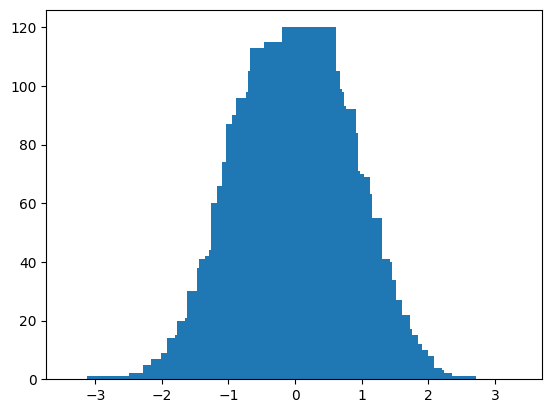

In [ ]:
y_val = tf.histogram_fixed_width(qkv, [-3,3], nbins=200)
x_val = np.arange(-1,1,0.01)*3
plt.bar(x_val, y_val, align='center')

In [ ]:
num_heads = 8
head_dim = d_model // num_heads
qkv = tf.reshape(qkv, [batch_size, sequence_length, num_heads, 3*head_dim])

In [ ]:
qkv.shape

TensorShape([1, 4, 8, 192])

In [ ]:
qkv = tf.transpose(qkv, perm=[0, 2, 1, 3])

In [ ]:
qkv.shape

TensorShape([1, 8, 4, 192])

In [ ]:
q,k,v = tf.split(qkv, 3, axis=-1)
q.shape, k.shape, v.shape

(TensorShape([1, 8, 4, 64]),
 TensorShape([1, 8, 4, 64]),
 TensorShape([1, 8, 4, 64]))

# self-attention for multi heads

In [ ]:
d_k = q.shape[-1]
scaled = tf.linalg.matmul(q, tf.transpose(k, perm=[0,1,3,2]))/math.sqrt(d_k)
scaled.shape

TensorShape([1, 8, 4, 4])

In [ ]:
mask = tf.experimental.numpy.triu(
    tf.fill(scaled.shape, -float('inf')), k=1
)
mask[0][1]

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]], dtype=float32)>

In [ ]:
(scaled+mask)[0][1]

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[ 0.03382403,        -inf,        -inf,        -inf],
       [ 0.40852624,  0.19772756,        -inf,        -inf],
       [ 0.44695693, -0.04619832,  0.71070087,        -inf],
       [ 0.31117177, -0.09555028,  0.09923264, -0.69150394]],
      dtype=float32)>

In [ ]:
scaled += mask

In [ ]:
attention = tf.keras.layers.Softmax(
    axis=-1)(scaled)

In [ ]:
attention.shape

TensorShape([1, 8, 4, 4])

In [ ]:
attention[0][0]

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[0.99999994, 0.        , 0.        , 0.        ],
       [0.5800391 , 0.41996104, 0.        , 0.        ],
       [0.4152224 , 0.33018377, 0.25459385, 0.        ],
       [0.18456772, 0.45852146, 0.1584284 , 0.19848241]], dtype=float32)>

In [ ]:
values = tf.linalg.matmul(attention,v)

In [ ]:
values

<tf.Tensor: shape=(1, 8, 4, 64), dtype=float32, numpy=
array([[[[ 0.07677756, -0.8028991 ,  0.416999  , ...,  1.1993831 ,
           0.3989647 ,  0.03577034],
         [ 0.06373545, -0.38767254,  0.16199876, ...,  0.33009982,
           0.4581686 , -0.616297  ],
         [-0.18731739, -0.15258214,  0.08465487, ...,  0.4272296 ,
           0.44975096, -0.30410314],
         [-0.43370602,  0.07009131,  0.02384048, ..., -0.30419996,
           0.30547428, -0.5999064 ]],

        [[ 0.10872214,  0.13181518, -0.38858643, ..., -1.1281129 ,
          -0.25746676,  0.47692582],
         [-0.07372171,  0.43821526, -0.59366524, ..., -0.6563602 ,
           0.1256997 ,  0.31178916],
         [ 0.0382386 ,  0.61404455, -0.83080024, ..., -0.46953416,
          -0.07604705, -0.29038656],
         [ 0.03930473,  0.46189433, -0.670296  , ..., -0.3028288 ,
          -0.07931034, -0.02533519]],

        [[ 1.0198421 , -0.68251276,  1.0378771 , ...,  0.15581325,
           0.79219764, -0.05340451],
     

In [ ]:
values = tf.reshape(values, [batch_size,sequence_length, num_heads*head_dim])
values

<tf.Tensor: shape=(1, 4, 512), dtype=float32, numpy=
array([[[ 0.07677756, -0.8028991 ,  0.416999  , ..., -0.3028288 ,
         -0.07931034, -0.02533519],
        [ 1.0198421 , -0.68251276,  1.0378771 , ..., -0.15240796,
         -0.07409684,  0.01128155],
        [-0.08656189,  0.06662884, -1.5984715 , ...,  0.26034033,
          0.6060009 , -0.8057999 ],
        [ 0.60531646,  0.40599123,  0.79129845, ...,  0.147638  ,
          0.7294823 ,  0.27754277]]], dtype=float32)>

In [ ]:
linear_layer = tf.keras.layers.Dense(d_model,input_shape=[d_model,1], activation=None)

In [ ]:
out = linear_layer(values)

In [ ]:
out.shape

TensorShape([1, 4, 512])

In [ ]:
def scaled_dot_product_attention(q,k,v,mask=None):
  d_k = q.shape[-1]
  scaled = tf.linalg.matmul(q,tf.transpose(k, perm=[0,1,3,2])) / tf.math.sqrt(tf.cast(d_k, tf.float32))
  if mask is not None:
    scaled = scaled + mask

  attention = tf.nn.softmax(scaled, axis=-1)
  out = tf.linalg.matmul(attention,v)
  return out, attention

class MultiheadAttention(tf.keras.layers.Layer):

  def __init__(self, input_dim, d_model, num_heads):
    super().__init__()
    self.input_dim = input_dim
    self.d_model = d_model
    self.head_dim = d_model//num_heads
    self.num_heads = num_heads
    self.qkv_layer = tf.keras.layers.Dense(units=3*d_model, input_shape=[input_dim,1], activation=None)
    # self.qkv_layer = self.add_weight(shape=[input_dim,3*d_model], trainable=True)
    self.linear_layer = tf.keras.layers.Dense(units=d_model, input_shape=[d_model,1], activation=None)
    # self.linear_layer = self.add_weight(shape=[d_model,d_model], trainable=True)

  def call(self,x,mask=None):
    batch_size, sequence_length, input_dim = x.shape
    qkv = self.qkv_layer(x)
    qkv = tf.reshape(qkv, [batch_size, sequence_length, self.num_heads, 3*self.head_dim])
    qkv = tf.transpose(qkv, perm=[0, 2, 1, 3])
    q,k,v = tf.split(qkv, 3, axis=-1)
    values, attention = scaled_dot_product_attention(q,k,v,mask)
    values = tf.reshape(values, [batch_size, sequence_length, self.num_heads*self.head_dim])
    out = self.linear_layer(values)
    return out


In [ ]:
input_dim = 1024
d_model = 512
num_heads = 8

batch_size = 30
sequence_length = 5
x = tf.experimental.numpy.random.randn(batch_size, sequence_length, input_dim)
model = MultiheadAttention(input_dim,d_model, num_heads)
out = model(x)

In [ ]:
out.shape

TensorShape([30, 5, 512])

# Positional encoding

In [ ]:
class PositionalEncoding(tf.keras.layers.Layer):
  def __init__(self, d_model, max_sequence_length):
    super().__init__()
    self.max_sequence_length = max_sequence_length
    self.d_model = d_model

  def call(self):
    even_i = tf.experimental.numpy.arange(0, stop=self.d_model, step=2, dtype=float)
    denominator = tf.math.pow(10000, even_i/self.d_model)
    position = tf.reshape(tf.experimental.numpy.arange(0,stop=self.max_sequence_length, dtype=denominator.dtype), [self.max_sequence_length,1])
    even_PE = tf.math.sin(position/denominator)
    odd_PE = tf.math.cos(position/denominator)
    stacked = tf.stack([even_PE,odd_PE], axis=2)
    PE = tf.keras.layers.Flatten()(stacked)
    return PE

In [ ]:
class PositionalEncoding(tf.keras.layers.Layer):
  def __init__(self):
    super().__init__()

  def call(self, d_model, max_sequence_length):
    d_model = tf.cast(d_model, tf.float64)
    max_sequence_length = tf.cast(max_sequence_length, tf.float64)
    even_i = tf.experimental.numpy.arange(0, stop=d_model, step=2, dtype=float)
    denominator = tf.math.pow(tf.cast(10000, tf.float64), even_i/d_model)
    position = tf.reshape(tf.experimental.numpy.arange(0,stop=max_sequence_length, dtype=denominator.dtype), [max_sequence_length,1])
    even_PE = tf.math.sin(position/denominator)
    odd_PE = tf.math.cos(position/denominator)
    stacked = tf.stack([even_PE,odd_PE], axis=2)
    PE = tf.keras.layers.Flatten()(stacked)
    return PE

In [ ]:
pe = PositionalEncoding()(d_model=6, max_sequence_length=10)
pe

<tf.Tensor: shape=(10, 6), dtype=float32, numpy=
array([[ 0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ],
       [ 0.84147096,  0.5403023 ,  0.04639922,  0.998923  ,  0.00215443,
         0.9999977 ],
       [ 0.9092974 , -0.41614684,  0.0926985 ,  0.9956942 ,  0.00430886,
         0.9999907 ],
       [ 0.14112   , -0.9899925 ,  0.1387981 ,  0.9903207 ,  0.00646326,
         0.99997914],
       [-0.7568025 , -0.6536436 ,  0.18459873,  0.98281395,  0.00861763,
         0.99996287],
       [-0.9589243 ,  0.2836622 ,  0.23000172,  0.97319025,  0.01077196,
         0.999942  ],
       [-0.2794155 ,  0.96017027,  0.27490926,  0.9614702 ,  0.01292625,
         0.99991643],
       [ 0.6569866 ,  0.75390226,  0.31922466,  0.94767904,  0.01508047,
         0.9998863 ],
       [ 0.98935825, -0.14550003,  0.36285242,  0.9318466 ,  0.01723462,
         0.99985147],
       [ 0.4121185 , -0.91113025,  0.40569857,  0.91400695,  0.0193887 ,
         0.999812  ]], 

# Layer Normalization

In [ ]:
class LayerNormalization(tf.keras.layers.Layer):
  def __init__(self, parameters_shape, eps=1e-5):
    super().__init__()
    self.parameters_shape = parameters_shape
    self.eps = eps
    self.gamma = self.add_weight(shape=parameters_shape, initializer=tf.keras.initializers.Constant(value=1),trainable=True)
    self.beta = self.add_weight(shape=parameters_shape, initializer=tf.keras.initializers.Constant(value=0),trainable=True)

  def call(self, input):
    dims = [-(i+1) for i in range(len(self.parameters_shape))]
    mean = tf.math.reduce_mean(input, axis = dims, keepdims=True)
    var = tf.math.reduce_mean(((input - mean) ** 2), axis = dims, keepdims=True)
    std = tf.math.sqrt((var + self.eps))
    y = (input - mean) / std
    out = self.gamma * y + self.beta
    return out


In [ ]:
x = tf.experimental.numpy.random.randn(batch_size, sequence_length, 512)
layer = LayerNormalization(parameters_shape=[512])
layer(x)

<tf.Tensor: shape=(30, 5, 512), dtype=float32, numpy=
array([[[-0.59065086, -0.55234396,  0.53714997, ...,  0.0430456 ,
         -1.6428852 , -0.85690325],
        [ 1.4635557 ,  0.07678024, -1.5657271 , ..., -0.88312155,
         -0.5795958 ,  0.7273063 ],
        [ 0.30792814,  0.75903445,  0.16480885, ...,  0.300725  ,
          0.46388632,  1.1672838 ],
        [-0.8334757 ,  1.8001858 , -0.43668064, ..., -0.20089668,
          0.9106056 , -0.67561096],
        [ 0.29541305,  0.22486064,  0.21803203, ..., -1.1799544 ,
         -0.30272996, -3.1579776 ]],

       [[ 0.83914506,  0.7880799 , -1.685045  , ..., -0.1847178 ,
         -1.6700857 , -1.2737597 ],
        [-0.70374745, -0.13768704,  0.41842818, ...,  1.5532963 ,
          0.11830629, -0.22298202],
        [-1.5157161 , -0.7038043 ,  0.13204554, ..., -1.2613208 ,
         -0.04532935,  0.79891884],
        [-0.44711804, -0.01101441, -1.5050968 , ...,  0.2825658 ,
         -0.93766195, -1.3327582 ],
        [-0.3140302 , -1.7

In [ ]:
layer = MultiheadAttention(input_dim,d_model, num_heads)
# print([var.name for var in layer.trainable])

In [ ]:
layer.trainable

True

In [ ]:
layer.weights

[]

# Encoder

In [ ]:
d_model = 512
num_heads = 8
drop_prob = 0.1
batch_size = 30
max_sequence_length = 200
ffn_hidden = 2048
num_layers = 5

In [ ]:
def scaled_dot_product_attention(q,k,v,mask=None):
  d_k = q.shape[-1]
  scaled = tf.linalg.matmul(q,tf.transpose(k, perm=[0,1,3,2])) / tf.math.sqrt(tf.cast(d_k, tf.float32))
  if mask is not None:
    scaled = scaled + mask

  attention = tf.nn.softmax(scaled, axis=-1)
  out = tf.linalg.matmul(attention,v)
  return out, attention

class MultiheadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads):
    super().__init__()
    self.d_model = d_model
    self.head_dim = d_model//num_heads
    self.num_heads = num_heads
    self.qkv_layer = tf.keras.layers.Dense(units=3*d_model, input_shape=[d_model,1], activation=None)
    # self.qkv_layer = self.add_weight(shape=[input_dim,3*d_model], trainable=True)
    self.linear_layer = tf.keras.layers.Dense(units=d_model, input_shape=[d_model,1], activation=None)
    # self.linear_layer = self.add_weight(shape=[d_model,d_model], trainable=True)

  def call(self,x,mask=None):
    batch_size, sequence_length, d_model = x.shape
    qkv = self.qkv_layer(x)
    qkv = tf.reshape(qkv, [batch_size, sequence_length, self.num_heads, 3*self.head_dim])
    qkv = tf.transpose(qkv, perm=[0, 2, 1, 3])
    q,k,v = tf.split(qkv, 3, axis=-1)
    values, attention = scaled_dot_product_attention(q,k,v,mask)
    values = tf.reshape(tf.transpose(values, perm=[0, 2, 1, 3]), [batch_size, sequence_length, self.num_heads*self.head_dim])
    out = self.linear_layer(values)
    return out

class LayerNormalization(tf.keras.layers.Layer):
  def __init__(self, parameters_shape, eps=1e-5):
    super().__init__()
    self.parameters_shape = parameters_shape
    self.eps = eps
    self.gamma = self.add_weight(shape=parameters_shape, initializer=tf.keras.initializers.Constant(value=1),trainable=True)
    self.beta = self.add_weight(shape=parameters_shape, initializer=tf.keras.initializers.Constant(value=0),trainable=True)

  def call(self, input):
    dims = [-(i+1) for i in range(len(self.parameters_shape))]
    mean = tf.math.reduce_mean(input, axis = dims, keepdims=True)
    var = tf.math.reduce_mean(((input - mean) ** 2), axis = dims, keepdims=True)
    std = tf.math.sqrt((var + self.eps))
    y = (input - mean) / std
    out = self.gamma * y + self.beta
    return out

class PositionalEncoding(tf.keras.layers.Layer):
  def __init__(self):
    super().__init__()

  def call(self, d_model, max_sequence_length):
    d_model = tf.cast(d_model, tf.float64)
    max_sequence_length = tf.cast(max_sequence_length, tf.float64)
    even_i = tf.experimental.numpy.arange(0, stop=d_model, step=2, dtype=float)
    denominator = tf.math.pow(tf.cast(10000, tf.float64), even_i/d_model)
    position = tf.reshape(tf.experimental.numpy.arange(0,stop=max_sequence_length, dtype=denominator.dtype), [max_sequence_length,1])
    even_PE = tf.math.sin(position/denominator)
    odd_PE = tf.math.cos(position/denominator)
    stacked = tf.stack([even_PE,odd_PE], axis=2)
    PE = tf.keras.layers.Flatten()(stacked)
    return PE

class PositionwiseFeedForward(tf.keras.layers.Layer):
  def __init__(self,d_model, hidden, drop_prob):
    super(PositionwiseFeedForward, self).__init__()
    self.linear1 = tf.keras.layers.Dense(units=hidden, input_shape=[d_model,1], activation=None)
    self.linear2 = tf.keras.layers.Dense(units=d_model, input_shape=[hidden,1], activation=None)
    self.relu = tf.keras.layers.ReLU()
    self.dropout = tf.keras.layers.Dropout(drop_prob)

  def call(self, x):
    x = self.linear1(x)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.linear2(x)
    return x

class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self,d_model,ffn_hidden,num_heads,drop_prob):
    super(EncoderLayer, self).__init__()
    self.attention = MultiheadAttention(d_model, num_heads)
    self.norm1 = LayerNormalization(parameters_shape=[d_model])
    self.dropout1 = tf.keras.layers.Dropout(drop_prob)
    self.ffn = PositionwiseFeedForward(d_model = d_model, hidden=ffn_hidden, drop_prob=drop_prob)
    self.norm2 = LayerNormalization(parameters_shape=[d_model])
    self.dropout2 = tf.keras.layers.Dropout(drop_prob)

  def call(self, x, self_attention_mask):
    residual_x = tf.identity(x)
    x = self.attention(x, mask=None)
    x = self.dropout1(x)
    x = self.norm1(x + tf.cast(residual_x, dtype=x.dtype))
    residual_x = tf.identity(x)
    x = self.ffn(x)
    x = self.dropout2(x)
    x = self.norm2(x + tf.cast(residual_x, dtype=x.dtype))
    return x

class Encoder(tf.keras.layers.Layer):
  def __init__(self, d_model, ffn_hidden, num_heads, drop_prob, num_layers, max_sequence_length, language_to_index, START_TOKEN,END_TOKEN, PADDING_TOKEN):
    super().__init__()
    # self.sentence_embedding = SentenceEmbedding(max_sequence_length, d_model, language_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN)
    self.layers = [
        EncoderLayer(d_model,ffn_hidden,num_heads,drop_prob)
        for _ in range(num_layers)
    ]
    self.num_layers = num_layers

  def call(self, x, self_attention_mask, start_token, end_token):
    # x = self.sentence_embedding(x, start_token, end_token)
    for layer in range(self.num_layers):
      x = self.layers[layer](x, self_attention_mask)

    return x

In [ ]:
self.layers = [
        DecoderLayer(d_model,ffn_hidden,num_heads,drop_prob)
        for _ in range(num_layers)
    ]
    self.num_layers = num_layers

  def call(self, x, y, self_attention_mask, cross_attention_mask, start_token, end_token):
    # y = self.sentence_embedding(y, start_token, end_token)
    for layer in range(self.num_layers):
      y = self.layers[layer](x, y, self_attention_mask, cross_attention_mask)

    return y


IndentationError: ignored

In [ ]:
encoder = Encoder(d_model, ffn_hidden, num_heads, drop_prob, num_layers, max_sequence_length, [], 's', 'e', 'p')
x = tf.experimental.numpy.random.randn(batch_size, max_sequence_length, d_model)
out = encoder(x, None, 's', 'e')

In [ ]:
out.shape

TensorShape([30, 200, 512])

# Decoder

In [ ]:
d_model = 512
num_heads = 8
drop_prob = 0.1
batch_size = 30
max_sequence_length = 200
ffn_hidden = 2048
num_layers = 5

In [ ]:
class MultiheadCrossAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads):
    super().__init__()
    self.d_model = d_model
    self.head_dim = d_model//num_heads
    self.num_heads = num_heads
    self.kv_layer = tf.keras.layers.Dense(units=2*d_model, input_shape=[d_model,1], activation=None)
    self.q_layer = tf.keras.layers.Dense(units=d_model, input_shape=[d_model,1], activation=None)
    self.linear_layer = tf.keras.layers.Dense(units=d_model, input_shape=[d_model,1], activation=None)

  def call(self, x, y, mask=None):
    batch_size, sequence_length, d_model = x.shape
    kv = self.kv_layer(x)
    q = self.q_layer(x)
    kv = tf.reshape(kv, [batch_size, sequence_length, self.num_heads, 2*self.head_dim])
    q = tf.reshape(q, [batch_size, sequence_length, self.num_heads, self.head_dim])
    kv = tf.transpose(kv, perm=[0, 2, 1, 3])
    q = tf.transpose(q, perm=[0, 2, 1, 3])
    k,v = tf.split(kv, 2, axis=-1)
    values, attention = scaled_dot_product_attention(q,k,v,mask)
    values = tf.reshape(tf.transpose(values, perm=[0, 2, 1, 3]), [batch_size, sequence_length, d_model])
    out = self.linear_layer(values)
    return out, attention

class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self,d_model,ffn_hidden,num_heads,drop_prob):
    super(DecoderLayer, self).__init__()
    self.self_attention = MultiheadAttention(d_model, num_heads)
    self.norm1 = LayerNormalization(parameters_shape=[d_model])
    self.dropout1 = tf.keras.layers.Dropout(drop_prob)

    self.encoder_decoder_attention = MultiheadCrossAttention(d_model=d_model, num_heads=num_heads)
    self.norm2 = LayerNormalization(parameters_shape=[d_model])
    self.dropout2 = tf.keras.layers.Dropout(drop_prob)

    self.ffn = PositionwiseFeedForward(d_model = d_model, hidden=ffn_hidden, drop_prob=drop_prob)
    self.norm3 = LayerNormalization(parameters_shape=[d_model])
    self.dropout3 = tf.keras.layers.Dropout(drop_prob)

  def call(self, x, y , self_attention_mask, cross_attention_mask):
    _y = tf.identity(y)
    y= self.self_attention(y, mask=self_attention_mask)
    y = self.dropout1(y)
    y = self.norm1(y + tf.cast(_y, dtype=y.dtype))

    _y = tf.identity(y)
    y, attention_dist = self.encoder_decoder_attention(x,y,mask=cross_attention_mask)
    # print(attention_dist.shape) (30, 8, 200, 200)
    y = self.dropout2(y)
    y = self.norm2(y + tf.cast(_y, dtype=y.dtype))

    _y = tf.identity(y)
    y = self.ffn(y)
    # print(y.shape) (30, 200, 512)
    y = self.dropout3(y)
    y = self.norm3(y + tf.cast(_y, dtype=y.dtype))

    return y


In [ ]:
def _calc_final_dist(x, gens, vocab_dists, attn_dists):
        """Calculate the final distribution, for the pointer-generator model

        Args:
          x: encoder input which contain oov number
          gens: the generation, choose vocab from article or vocab
          vocab_dists: The vocabulary distributions. List length max_dec_steps of (batch_size, vsize) arrays.
                       The words are in the order they appear in the vocabulary file.
          attn_dists: The attention distributions. List length max_dec_steps of (batch_size, attn_len) arrays

        Returns:
          final_dists: The final distributions. List length max_dec_steps of (batch_size, extended_vsize) arrays.
        """
        # with tf.variable_scope('final_distribution', reuse=tf.AUTO_REUSE):
            # Multiply vocab dists by p_gen and attention dists by (1-p_gen)
        vocab_dists = gens * vocab_dists
        attn_dists = (1-gens) * attn_dists

        batch_size = tf.shape(attn_dists)[0]
        dec_t = tf.shape(attn_dists)[1]
        attn_len = tf.shape(attn_dists)[2]

        dec = tf.range(0, limit=dec_t) # [dec]
        dec = tf.expand_dims(dec, axis=-1) # [dec, 1]
        dec = tf.tile(dec, [1, attn_len]) # [dec, atten_len]
        dec = tf.expand_dims(dec, axis=0) # [1, dec, atten_len]
        dec = tf.tile(dec, [batch_size, 1, 1]) # [batch_size, dec, atten_len]

        x = tf.expand_dims(x, axis=1) # [batch_size, 1, atten_len]
        x = tf.tile(x, [1, dec_t, 1]) # [batch_size, dec, atten_len]
        x = tf.stack([dec, x], axis=3)

        attn_dists_projected = tf.map_fn(fn=lambda y: tf.scatter_nd(y[0], y[1], [dec_t, self.hp.vocab_size]),
                                          elems=(x, attn_dists), dtype=tf.float32)

        final_dists = attn_dists_projected + vocab_dists

        return final_dists

In [ ]:

x1 = tf.experimental.numpy.random.randn(30, 200, 512)
gens = tf.experimental.numpy.random.randn(30, 200)
attn_dists = tf.experimental.numpy.random.randn(30, 200, 200)
vocab_dists = tf.experimental.numpy.random.randn(30, 200)
_calc_final_dist(x, gens, vocab_dists, attn_dists)

InvalidArgumentError: ignored

In [ ]:
x1 = tf.experimental.numpy.random.randn(30, 200, 512)
x2 = tf.experimental.numpy.random.randn(30, 200, 200)
tf.concat([x1, x2], axis=-1).shape
tf.keras.layers.Dense(1,input_shape = tf.concat([x1,x2], axis=-1).shape, activation=tf.sigmoid, use_bias=False)(tf.concat([x1, x2], axis=-1))

<tf.Tensor: shape=(30, 200, 1), dtype=float32, numpy=
array([[[0.22565502],
        [0.37905705],
        [0.33797178],
        ...,
        [0.11214606],
        [0.3995621 ],
        [0.5217021 ]],

       [[0.47759828],
        [0.46895948],
        [0.18123995],
        ...,
        [0.49253082],
        [0.68270475],
        [0.18030317]],

       [[0.36769792],
        [0.13251576],
        [0.5622465 ],
        ...,
        [0.9414817 ],
        [0.11035893],
        [0.6868868 ]],

       ...,

       [[0.45803824],
        [0.49118292],
        [0.41689026],
        ...,
        [0.4965311 ],
        [0.74906635],
        [0.30001855]],

       [[0.4188706 ],
        [0.65569407],
        [0.5005605 ],
        ...,
        [0.39486462],
        [0.6766262 ],
        [0.7723138 ]],

       [[0.8859939 ],
        [0.42927206],
        [0.29215103],
        ...,
        [0.9005278 ],
        [0.36763868],
        [0.06706905]]], dtype=float32)>

In [ ]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, d_model, ffn_hidden, num_heads, drop_prob, num_layers, max_sequence_length, language_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN):
    super().__init__()

    # self.sentence_embedding = SentenceEmbedding(max_sequence_length, d_model, language_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN)
    self.layers = [
        DecoderLayer(d_model,ffn_hidden,num_heads,drop_prob)
        for _ in range(num_layers)
    ]
    self.num_layers = num_layers

  def call(self, x, y, self_attention_mask, cross_attention_mask, start_token, end_token):
    # y = self.sentence_embedding(y, start_token, end_token)
    for layer in range(self.num_layers):
      y = self.layers[layer](x, y, self_attention_mask, cross_attention_mask)

    return y

In [ ]:
decoder = Decoder(d_model, ffn_hidden, num_heads, drop_prob, num_layers, max_sequence_length, [], 'sstart', 'end', 'pad')
x = tf.experimental.numpy.random.randn(batch_size, max_sequence_length, d_model)
y = tf.experimental.numpy.random.randn(batch_size, max_sequence_length, d_model)
mask = np.tril(np.ones( (max_sequence_length,max_sequence_length) ))
mask[mask == 0] = -np.infty
mask[mask == 1] = 0

out = decoder(x,y,mask, None, 'start', 'end')

(30, 200, 512)
(30, 200, 512)
(30, 200, 512)
(30, 200, 512)
(30, 200, 512)


In [ ]:
out.shape

TensorShape([30, 200, 512])

# Transformer

In [ ]:
class SentenceEmbedding(tf.keras.layers.Layer):
    "For a given sentence, create an embedding"
    def __init__(self, max_sequence_length, d_model, language_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN):
        super().__init__()
        self.vocab_size = len(language_to_index)
        self.max_sequence_length = max_sequence_length
        self.embedding = tf.keras.layers.Embedding(self.vocab_size, d_model)
        self.language_to_index = language_to_index
        self.position_encoder = PositionalEncoding(d_model, max_sequence_length)
        self.dropout = tf.keras.layers.Dropout(drop_prob)
        self.START_TOKEN = START_TOKEN
        self.END_TOKEN = END_TOKEN
        self.PADDING_TOKEN = PADDING_TOKEN

    def batch_tokenize(self, batch, start_token, end_token):

        def tokenize(sentence, start_token, end_token):
            sentence_word_indicies = [self.language_to_index[token] for token in list(sentence)]
            if start_token:
                sentence_word_indicies.insert(0, self.language_to_index[self.START_TOKEN])
            if end_token:
                sentence_word_indicies.append(self.language_to_index[self.END_TOKEN])
            for _ in range(len(sentence_word_indicies), self.max_sequence_length):
                sentence_word_indicies.append(self.language_to_index[self.PADDING_TOKEN])
            return tf.convert_to_tensor(sentence_word_indicies)

        tokenized = []
        for sentence_num in range(len(batch)):
           tokenized.append( tokenize(batch[sentence_num], start_token, end_token) )
        tokenized = tf.stack(tokenized)
        return tokenized

    def call(self, x, start_token, end_token): # sentence
        x = self.batch_tokenize(x, start_token, end_token)
        x = self.embedding(x)
        pos = self.position_encoder()
        x = self.dropout(x + pos)
        return x

In [ ]:
NEG_INFTY = -1e9

def create_masks(eng_batch, kn_batch):
    num_sentences = len(eng_batch)
    look_ahead_mask = tf.convert_to_tensor(np.triu(np.full((max_sequence_length, max_sequence_length), fill_value = True), k=1))
    encoder_padding_mask = tf.convert_to_tensor(np.full((num_sentences,max_sequence_length, max_sequence_length), fill_value = False))
    decoder_padding_mask_self_attention = tf.convert_to_tensor(np.full((num_sentences,max_sequence_length, max_sequence_length), fill_value = False))
    decoder_padding_mask_cross_attention = tf.convert_to_tensor(np.full((num_sentences,max_sequence_length, max_sequence_length), fill_value = False))

    for idx in range(num_sentences):
      eng_sentence_length, kn_sentence_length = len(eng_batch[idx]), len(kn_batch[idx])
      eng_chars_to_padding_mask = np.arange(eng_sentence_length + 1, max_sequence_length)
      kn_chars_to_padding_mask = np.arange(kn_sentence_length + 1, max_sequence_length)
      encoder_padding_mask[idx, :, eng_chars_to_padding_mask] = True
      encoder_padding_mask[idx, eng_chars_to_padding_mask, :] = True
      decoder_padding_mask_self_attention[idx, :, kn_chars_to_padding_mask] = True
      decoder_padding_mask_self_attention[idx, kn_chars_to_padding_mask, :] = True
      decoder_padding_mask_cross_attention[idx, :, eng_chars_to_padding_mask] = True
      decoder_padding_mask_cross_attention[idx, kn_chars_to_padding_mask, :] = True

    encoder_self_attention_mask = tf.where(encoder_padding_mask, NEG_INFTY, 0)
    decoder_self_attention_mask =  tf.where(look_ahead_mask + decoder_padding_mask_self_attention, NEG_INFTY, 0)
    decoder_cross_attention_mask = tf.where(decoder_padding_mask_cross_attention, NEG_INFTY, 0)
    return encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask

In [ ]:
class Transformer(tf.keras.layers.Layer):
  def __init__(self,
               d_model,
               ffn_hidden,
               num_heads,
               drop_prob,
               num_layers,
               max_sequence_length,
               kn_vocab_size,
               english_to_index,
               START_TOKEN,
               END_TOKEN,
               PADDING_TOKEN):
    super().__init__()

    self.encoder = Encoder(d_model, ffn_hidden, num_heads, drop_prob, num_layers, max_sequence_length, english_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN)
    self.decoder = Decoder(d_model, ffn_hidden, num_heads, drop_prob, num_layers, max_sequence_length, english_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN)
    self.linear = tf.keras.layers.Dense(d_model, input_shape=[kn_vocab_size,1], activation=None)

    def call(self,
                x,
                y,
                encoder_self_attention_mask=None,
                decoder_self_attention_mask=None,
                decoder_cross_attention_mask=None,
                enc_start_token=False,
                enc_end_token=False,
                dec_start_token=False, # We should make this true
                dec_end_token=False): # x, y are batch of sentences
        x = self.encoder(x, encoder_self_attention_mask, start_token=enc_start_token, end_token=enc_end_token)
        out = self.decoder(x, y, decoder_self_attention_mask, decoder_cross_attention_mask, start_token=dec_start_token, end_token=dec_end_token)
        out = self.linear(out)
        out = tf.nn.softmax(out)
        return out

# Final

In [ ]:
d_model = 512
num_heads = 8
drop_prob = 0.1
batch_size = 10
max_sequence_length = 500
ffn_hidden = 2048
num_layers = 4

In [ ]:
def scaled_dot_product_attention(q,k,v,mask=None):
  d_k = q.shape[-1]
  scaled = tf.linalg.matmul(q,tf.transpose(k, perm=[0,1,3,2])) / tf.math.sqrt(tf.cast(d_k, tf.float32))
  if mask is not None:
    scaled = tf.transpose(scaled, perm=[1,0,2,3]) + mask
    # scaled = scaled.permute(1, 0, 2, 3) + mask
    # scaled = scaled.permute(1, 0, 2, 3)
    scaled = tf.transpose(scaled, perm=[1,0,2,3])
    # scaled = scaled + mask

  attention = tf.nn.softmax(scaled, axis=-1)
  out = tf.linalg.matmul(attention,v)
  return out, attention

class MultiheadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads):
    super().__init__()
    self.d_model = d_model
    self.head_dim = d_model//num_heads
    self.num_heads = num_heads
    self.qkv_layer = tf.keras.layers.Dense(units=3*d_model, input_shape=[d_model,1], activation=None)
    # self.qkv_layer = self.add_weight(shape=[input_dim,3*d_model], trainable=True)
    self.linear_layer = tf.keras.layers.Dense(units=d_model, input_shape=[d_model,1], activation=None)
    # self.linear_layer = self.add_weight(shape=[d_model,d_model], trainable=True)

  def call(self,x,mask=None):
    batch_size, sequence_length, d_model = x.shape
    qkv = self.qkv_layer(x)
    qkv = tf.reshape(qkv, [batch_size, sequence_length, self.num_heads, 3*self.head_dim])
    qkv = tf.transpose(qkv, perm=[0, 2, 1, 3])
    q,k,v = tf.split(qkv, 3, axis=-1)
    values, attention = scaled_dot_product_attention(q,k,v,mask)
    values = tf.reshape(tf.transpose(values, perm=[0, 2, 1, 3]), [batch_size, sequence_length, self.num_heads*self.head_dim])
    out = self.linear_layer(values)
    return out

class LayerNormalization(tf.keras.layers.Layer):
  def __init__(self, parameters_shape, eps=1e-5):
    super().__init__()
    self.parameters_shape = parameters_shape
    self.eps = eps
    self.gamma = self.add_weight(shape=parameters_shape, initializer=tf.keras.initializers.Constant(value=1),trainable=True)
    self.beta = self.add_weight(shape=parameters_shape, initializer=tf.keras.initializers.Constant(value=0),trainable=True)

  def call(self, input):
    dims = [-(i+1) for i in range(len(self.parameters_shape))]
    mean = tf.math.reduce_mean(input, axis = dims, keepdims=True)
    var = tf.math.reduce_mean(((input - mean) ** 2), axis = dims, keepdims=True)
    std = tf.math.sqrt((var + self.eps))
    y = (input - mean) / std
    out = self.gamma * y + self.beta
    return out

class PositionalEncoding(tf.keras.layers.Layer):
  def __init__(self, d_model, max_sequence_length):
    super().__init__()
    self.d_model = d_model
    self.max_sequence_length = max_sequence_length

  def call(self):
    d_model = tf.cast(self.d_model, tf.float64)
    max_sequence_length = tf.cast(self.max_sequence_length, tf.float64)
    even_i = tf.experimental.numpy.arange(0, stop=d_model, step=2, dtype=float)
    denominator = tf.math.pow(tf.cast(10000, tf.float64), even_i/d_model)
    position = tf.reshape(tf.experimental.numpy.arange(0,stop=max_sequence_length, dtype=denominator.dtype), [max_sequence_length,1])
    even_PE = tf.math.sin(position/denominator)
    odd_PE = tf.math.cos(position/denominator)
    stacked = tf.stack([even_PE,odd_PE], axis=2)
    PE = tf.keras.layers.Flatten()(stacked)
    return PE

class PositionwiseFeedForward(tf.keras.layers.Layer):
  def __init__(self,d_model, hidden, drop_prob):
    super(PositionwiseFeedForward, self).__init__()
    self.linear1 = tf.keras.layers.Dense(units=hidden, input_shape=[d_model,1], activation=None)
    self.linear2 = tf.keras.layers.Dense(units=d_model, input_shape=[hidden,1], activation=None)
    self.relu = tf.keras.layers.ReLU()
    self.dropout = tf.keras.layers.Dropout(drop_prob)

  def call(self, x):
    x = self.linear1(x)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.linear2(x)
    return x

class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self,d_model,ffn_hidden,num_heads,drop_prob):
    super(EncoderLayer, self).__init__()
    self.attention = MultiheadAttention(d_model, num_heads)
    self.norm1 = LayerNormalization(parameters_shape=[d_model])
    self.dropout1 = tf.keras.layers.Dropout(drop_prob)
    self.ffn = PositionwiseFeedForward(d_model = d_model, hidden=ffn_hidden, drop_prob=drop_prob)
    self.norm2 = LayerNormalization(parameters_shape=[d_model])
    self.dropout2 = tf.keras.layers.Dropout(drop_prob)

  def call(self, x, self_attention_mask):
    residual_x = tf.identity(x)
    x = self.attention(x, mask=None)
    x = self.dropout1(x)
    x = self.norm1(x + tf.cast(residual_x, dtype=x.dtype))
    residual_x = tf.identity(x)
    x = self.ffn(x)
    x = self.dropout2(x)
    x = self.norm2(x + tf.cast(residual_x, dtype=x.dtype))
    return x

class Encoder(tf.keras.layers.Layer):
  def __init__(self, d_model, ffn_hidden, num_heads, drop_prob, num_layers, max_sequence_length, language_to_index, START_TOKEN,END_TOKEN, PADDING_TOKEN):
    super().__init__()
    self.sentence_embedding = SentenceEmbedding(max_sequence_length, d_model, language_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN)
    self.layers = [
        EncoderLayer(d_model,ffn_hidden,num_heads,drop_prob)
        for _ in range(num_layers)
    ]
    self.num_layers = num_layers

  def call(self, x, self_attention_mask, start_token, end_token):
    x = self.sentence_embedding(x, start_token, end_token)
    for layer in range(self.num_layers):
      x = self.layers[layer](x, self_attention_mask)

    return x

In [ ]:
class MultiheadCrossAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads):
    super().__init__()
    self.d_model = d_model
    self.head_dim = d_model//num_heads
    self.num_heads = num_heads
    self.kv_layer = tf.keras.layers.Dense(units=2*d_model, input_shape=[d_model,1], activation=None)
    self.q_layer = tf.keras.layers.Dense(units=d_model, input_shape=[d_model,1], activation=None)
    self.linear_layer = tf.keras.layers.Dense(units=d_model, input_shape=[d_model,1], activation=None)

  def call(self, x, y, mask=None):
    batch_size, sequence_length, d_model = x.shape
    kv = self.kv_layer(x)
    q = self.q_layer(x)
    kv = tf.reshape(kv, [batch_size, sequence_length, self.num_heads, 2*self.head_dim])
    q = tf.reshape(q, [batch_size, sequence_length, self.num_heads, self.head_dim])
    kv = tf.transpose(kv, perm=[0, 2, 1, 3])
    q = tf.transpose(q, perm=[0, 2, 1, 3])
    k,v = tf.split(kv, 2, axis=-1)
    values, attention = scaled_dot_product_attention(q,k,v,mask)
    values = tf.reshape(tf.transpose(values, perm=[0, 2, 1, 3]), [batch_size, sequence_length, d_model])
    out = self.linear_layer(values)
    return out, attention

class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self,d_model,ffn_hidden,num_heads,drop_prob):
    super(DecoderLayer, self).__init__()
    self.self_attention = MultiheadAttention(d_model, num_heads)
    self.norm1 = LayerNormalization(parameters_shape=[d_model])
    self.dropout1 = tf.keras.layers.Dropout(drop_prob)

    self.encoder_decoder_attention = MultiheadCrossAttention(d_model=d_model, num_heads=num_heads)
    self.norm2 = LayerNormalization(parameters_shape=[d_model])
    self.dropout2 = tf.keras.layers.Dropout(drop_prob)

    self.ffn = PositionwiseFeedForward(d_model = d_model, hidden=ffn_hidden, drop_prob=drop_prob)
    self.norm3 = LayerNormalization(parameters_shape=[d_model])
    self.dropout3 = tf.keras.layers.Dropout(drop_prob)

  def call(self, x, y , self_attention_mask, cross_attention_mask):
    _y = tf.identity(y)
    y= self.self_attention(y, mask=self_attention_mask)
    y = self.dropout1(y)
    y = self.norm1(y + tf.cast(_y, dtype=y.dtype))

    _y = tf.identity(y)
    y, attention_dist = self.encoder_decoder_attention(x,y,mask=cross_attention_mask)
    # print(attention_dist.shape) (30, 8, 200, 200)
    y = self.dropout2(y)
    y = self.norm2(y + tf.cast(_y, dtype=y.dtype))
    after_attn_norm = tf.identity(y)

    _y = tf.identity(y)
    y = self.ffn(y)
    # print(y.shape) (30, 200, 512)
    y = self.dropout3(y)
    y = self.norm3(y + tf.cast(_y, dtype=y.dtype))

    return y

class Decoder(tf.keras.layers.Layer):
  def __init__(self, d_model, ffn_hidden, num_heads, drop_prob, num_layers, max_sequence_length, language_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN):
    super().__init__()

    self.sentence_embedding = SentenceEmbedding(max_sequence_length, d_model, language_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN)
    self.layers = [
        DecoderLayer(d_model,ffn_hidden,num_heads,drop_prob)
        for _ in range(num_layers)
    ]
    self.num_layers = num_layers

  def call(self, x, y, self_attention_mask, cross_attention_mask, start_token, end_token):
    y = self.sentence_embedding(y, start_token, end_token)
    for layer in range(self.num_layers):
      y = self.layers[layer](x, y, self_attention_mask, cross_attention_mask)

    return y

In [ ]:
class SentenceEmbedding(tf.keras.layers.Layer):
    "For a given sentence, create an embedding"
    def __init__(self, max_sequence_length, d_model, language_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN):
        super().__init__()
        self.vocab_size = len(language_to_index)
        self.max_sequence_length = max_sequence_length
        self.embedding = tf.keras.layers.Embedding(self.vocab_size, d_model)
        self.language_to_index = tf.lookup.StaticHashTable(
                                      initializer=tf.lookup.KeyValueTensorInitializer(
                                      keys=tf.constant(list(language_to_index.keys())),
                                      values=tf.constant(list(language_to_index.values())),),
                                      default_value=tf.constant(-1),
                                      name="lang_to_index")
        self.position_encoder = PositionalEncoding(d_model, max_sequence_length)
        self.dropout = tf.keras.layers.Dropout(drop_prob)
        self.START_TOKEN = START_TOKEN
        self.END_TOKEN = END_TOKEN
        self.PADDING_TOKEN = PADDING_TOKEN

    def batch_tokenize(self, batch, start_token, end_token):
        # tf.config.run_functions_eagerly(True)
        # @tf.function
        def tokenize(sentence, start_token, end_token):
            input_tensor = tf.constant(list(sentence))
            sentence_word_indicies = list(self.language_to_index.lookup(input_tensor))
            # sentence_word_indicies = [self.language_to_index[token] for token in list(sentence)]
            if start_token:
                sentence_word_indicies.insert(0, self.language_to_index.lookup(tf.constant(self.START_TOKEN)))
            if end_token:
                sentence_word_indicies.append(self.language_to_index.lookup(tf.constant(self.END_TOKEN)))
            for _ in range(len(sentence_word_indicies), self.max_sequence_length):
                sentence_word_indicies.append(self.language_to_index.lookup(tf.constant(self.PADDING_TOKEN)))
            return tf.convert_to_tensor(sentence_word_indicies)

        tokenized = []
        for sentence_num in range(len(batch)):
           tokenized.append( tokenize(batch[sentence_num], start_token, end_token) )
        tokenized = tf.stack(tokenized)
        return tokenized

    def call(self, x, start_token, end_token): # sentence
        x = self.batch_tokenize(x, start_token, end_token)
        x = self.embedding(x)
        pos = self.position_encoder.call()
        x = self.dropout(x + pos)
        return x

NEG_INFTY = -1e9

def create_masks(eng_batch, kn_batch):
    num_sentences = len(eng_batch)
    look_ahead_mask = np.triu(np.full((max_sequence_length, max_sequence_length), fill_value = True), k=1)
    encoder_padding_mask = np.full((num_sentences,max_sequence_length, max_sequence_length), fill_value = False)
    decoder_padding_mask_self_attention = np.full((num_sentences,max_sequence_length, max_sequence_length), fill_value = False)
    decoder_padding_mask_cross_attention = np.full((num_sentences,max_sequence_length, max_sequence_length), fill_value = False)

    for idx in range(num_sentences):
      eng_sentence_length, kn_sentence_length = len(eng_batch[idx]), len(kn_batch[idx])
      eng_chars_to_padding_mask = np.arange(eng_sentence_length + 1, max_sequence_length)
      kn_chars_to_padding_mask = np.arange(kn_sentence_length + 1, max_sequence_length)
      encoder_padding_mask[idx, :, eng_chars_to_padding_mask] = True
      encoder_padding_mask[idx, eng_chars_to_padding_mask, :] = True
      decoder_padding_mask_self_attention[idx, :, kn_chars_to_padding_mask] = True
      decoder_padding_mask_self_attention[idx, kn_chars_to_padding_mask, :] = True
      decoder_padding_mask_cross_attention[idx, :, eng_chars_to_padding_mask] = True
      decoder_padding_mask_cross_attention[idx, kn_chars_to_padding_mask, :] = True

    encoder_self_attention_mask = tf.where(encoder_padding_mask, NEG_INFTY, 0)
    decoder_self_attention_mask =  tf.where(look_ahead_mask + decoder_padding_mask_self_attention, NEG_INFTY, 0)
    decoder_cross_attention_mask = tf.where(decoder_padding_mask_cross_attention, NEG_INFTY, 0)
    return tf.convert_to_tensor(encoder_self_attention_mask), tf.convert_to_tensor(decoder_self_attention_mask), tf.convert_to_tensor(decoder_cross_attention_mask)

In [ ]:
# class Transformer(tf.keras.Model):
#   def __init__(self,
#                d_model,
#                ffn_hidden,
#                num_heads,
#                drop_prob,
#                num_layers,
#                max_sequence_length,
#                kn_vocab_size,
#                english_to_index,
#                START_TOKEN,
#                END_TOKEN,
#                PADDING_TOKEN):
#     super(Transformer, self).__init__()

#     self.encoder = Encoder(d_model, ffn_hidden, num_heads, drop_prob, num_layers, max_sequence_length, english_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN)
#     self.decoder = Decoder(d_model, ffn_hidden, num_heads, drop_prob, num_layers, max_sequence_length, english_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN)
#     self.linear = tf.keras.layers.Dense(d_model, input_shape=[kn_vocab_size,1], activation=None)

#     def call(self,
#                 x,
#                 y,
#                 encoder_self_attention_mask=None,
#                 decoder_self_attention_mask=None,
#                 decoder_cross_attention_mask=None,
#                 enc_start_token=False,
#                 enc_end_token=False,
#                 dec_start_token=False, # We should make this true
#                 dec_end_token=False,
#                 training = True): # x, y are batch of sentences
#         x,y,encoder_self_attention_mask,decoder_self_attention_mask,decoder_cross_attention_mask,enc_start_token,enc_end_token,dec_start_token,dec_end_token,training = inputs[0], inputs[1], inputs[2], inputs[3], inputs[4], inputs[5], inputs[6], inputs[7], inputs[8]
#         x = self.encoder(x, encoder_self_attention_mask, start_token=enc_start_token, end_token=enc_end_token)
#         out = self.decoder(x, y, decoder_self_attention_mask, decoder_cross_attention_mask, start_token=dec_start_token, end_token=dec_end_token)
#         out = self.linear(out)
#         out = tf.nn.softmax(out)
#         return out

In [ ]:
class Transformer(tf.keras.Model):
  def __init__(self,
               d_model,
               ffn_hidden,
               num_heads,
               drop_prob,
               num_layers,
               max_sequence_length,
               kn_vocab_size,
               english_to_index,
               START_TOKEN,
               END_TOKEN,
               PADDING_TOKEN):
    super().__init__()
    self.kn_vocab_size = kn_vocab_size
    self.encoder = Encoder(d_model, ffn_hidden, num_heads, drop_prob, num_layers, max_sequence_length, english_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN)
    self.decoder = Decoder(d_model, ffn_hidden, num_heads, drop_prob, num_layers, max_sequence_length, english_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN)
    self.linear = tf.keras.layers.Dense(d_model,input_shape=[kn_vocab_size,1], activation=None)
    self.embedding = tf.keras.layers.Dense(kn_vocab_size, input_shape=[d_model,1])


  def call(self,inputs): # x, y are batch of sentences
      x,y,encoder_self_attention_mask,decoder_self_attention_mask,decoder_cross_attention_mask,enc_start_token,enc_end_token,dec_start_token,dec_end_token = inputs[0], inputs[1], inputs[2], inputs[3], inputs[4], inputs[5], inputs[6], inputs[7], inputs[8]
      x = self.encoder(x, encoder_self_attention_mask, start_token=enc_start_token, end_token=enc_end_token)
      out = self.decoder(x, y, decoder_self_attention_mask, decoder_cross_attention_mask, start_token=dec_start_token, end_token=dec_end_token)
      out = self.linear(out)
      out = self.embedding(out)
      out = tf.nn.softmax(out)
      return out

In [ ]:
transformer = Transformer(d_model, ffn_hidden, num_heads, drop_prob, num_layers, max_sequence_length,
               7,
               {'h':0, 'e':1, 'l':2, 'o':3, 'w':4, '<START>':5, '<END>':6, '<PAD>':7},
               "<START>",
               "<END>",
               "<PAD>")

In [ ]:
transformer.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask = create_masks([['hello']], [['how']])
pred = transformer(inputs=[['hello'],['how'], encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask, None, None, '<START>', '<END>'], training=True)
# print(pred.shape)
transformer.summary()

Model: "transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Encoder)           multiple                  15766016  
                                                                 
 decoder (Decoder)           multiple                  21024256  
                                                                 
 dense_55 (Dense)            multiple                  262656    
                                                                 
 dense_56 (Dense)            multiple                  3591      
                                                                 
Total params: 37056519 (141.36 MB)
Trainable params: 37056519 (141.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
pred

<tf.Tensor: shape=(1, 1000, 7), dtype=float32, numpy=
array([[[0.00694466, 0.07771082, 0.10130206, ..., 0.01313011,
         0.51431537, 0.04211096],
        [0.00480311, 0.1350927 , 0.2116793 , ..., 0.011832  ,
         0.2671412 , 0.14882112],
        [0.05800103, 0.05924869, 0.06553824, ..., 0.0820801 ,
         0.50122434, 0.01989182],
        ...,
        [0.032977  , 0.02458262, 0.05358369, ..., 0.03552193,
         0.66122115, 0.03110315],
        [0.02657798, 0.03105725, 0.03105089, ..., 0.04710429,
         0.55602485, 0.00764783],
        [0.02198996, 0.11633624, 0.02877367, ..., 0.02226381,
         0.6122687 , 0.02097907]]], dtype=float32)>

In [ ]:
labels = transformer.decoder.sentence_embedding.batch_tokenize(['how'], start_token=False, end_token=True)

In [ ]:
temp = np.max(pred, axis=-1)
temp = tf.cast(temp, labels.dtype)

<tf.Tensor: shape=(1, 1000, 7), dtype=float32, numpy=
array([[[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)>

In [ ]:
pred.shape

TensorShape([1, 1000, 5])

In [ ]:
np.argmax(pred, axis=-1).shape

(1, 1000)

In [ ]:
tf.keras.metrics.categorical_crossentropy(np.array([1,2,3,4,5]), np.array([1,2,3,4,1]))

TypeError: ignored

In [ ]:
tf.transpose(pred, perm=[0,2,1]).shape

TensorShape([1, 512, 1000])

In [ ]:
transformer.decoder.sentence_embedding.embedding(tf.transpose(pred, perm=[0,2,1])).shape

TensorShape([1, 512, 1000, 512])

In [ ]:
tf.one_hot(transformer.decoder.sentence_embedding.batch_tokenize([['how'],['are'], ['you']], start_token=False, end_token=True),7)

<tf.Tensor: shape=(3, 1000, 7), dtype=float32, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)>

# Getting Data

In [ ]:
iterable_dataset = load_dataset("csebuetnlp/xlsum",'english')

In [ ]:
iterable_dataset['train']

Dataset({
    features: ['id', 'url', 'title', 'summary', 'text'],
    num_rows: 306522
})

In [ ]:
vocabulary = {' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 'ʻ',
 'ʼ',
 'в',
 'е',
 'м',
 'н',
 'о',
 'р',
 'с',
 'т',
 'у',
 '‘',
 '’',
 '‚',
 '“',
 '”'
 '\n'}

In [ ]:
train_text, train_summ = [], []
count = 0
for i in iterable_dataset['train']:
  if len(list(i['text'])) <= max_sequence_length:
    if len(set(list(i['text'])) - vocabulary) == 0 and len(set(list(i['summary'])) - vocabulary) == 0:
      train_text.append(i['text'])
      train_summ.append(i['summary'])

  count += 1
  if count == 80000:
    break

In [ ]:
len(train_text), len(train_summ)

(6173, 6173)

In [ ]:
train_text = np.array(train_text)
train_summ = np.array(train_summ)

In [ ]:
# language_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN
final_vocabulary = vocabulary.copy()
final_vocabulary.add('<START>')
final_vocabulary.add('<END>')
final_vocabulary.add('<PAD>')

In [ ]:
language_to_index = {}

for ind, ele in enumerate(final_vocabulary):
  language_to_index[ele] = ind

In [ ]:
START_TOKEN, END_TOKEN, PADDING_TOKEN = '<START>', '<END>', '<PAD>'

In [ ]:
def create_masks(eng_batch, kn_batch,max_sequence_length):
    num_sentences = len(eng_batch)
    look_ahead_mask = np.triu(np.full((max_sequence_length, max_sequence_length), fill_value = True), k=1)
    encoder_padding_mask = np.full((num_sentences,max_sequence_length, max_sequence_length), fill_value = False)
    decoder_padding_mask_self_attention = np.full((num_sentences,max_sequence_length, max_sequence_length), fill_value = False)
    decoder_padding_mask_cross_attention = np.full((num_sentences,max_sequence_length, max_sequence_length), fill_value = False)

    for idx in range(num_sentences):
      eng_sentence_length, kn_sentence_length = len(eng_batch[idx]), len(kn_batch[idx])
      eng_chars_to_padding_mask = np.arange(eng_sentence_length + 1, max_sequence_length)
      kn_chars_to_padding_mask = np.arange(kn_sentence_length + 1, max_sequence_length)
      encoder_padding_mask[idx, :, eng_chars_to_padding_mask] = True
      encoder_padding_mask[idx, eng_chars_to_padding_mask, :] = True
      decoder_padding_mask_self_attention[idx, :, kn_chars_to_padding_mask] = True
      decoder_padding_mask_self_attention[idx, kn_chars_to_padding_mask, :] = True
      decoder_padding_mask_cross_attention[idx, :, eng_chars_to_padding_mask] = True
      decoder_padding_mask_cross_attention[idx, kn_chars_to_padding_mask, :] = True

    encoder_self_attention_mask = tf.where(encoder_padding_mask, NEG_INFTY, 0)
    decoder_self_attention_mask =  tf.where(look_ahead_mask + decoder_padding_mask_self_attention, NEG_INFTY, 0)
    decoder_cross_attention_mask = tf.where(decoder_padding_mask_cross_attention, NEG_INFTY, 0)
    return tf.convert_to_tensor(encoder_self_attention_mask), tf.convert_to_tensor(decoder_self_attention_mask), tf.convert_to_tensor(decoder_cross_attention_mask)

In [ ]:
range_ = list(i for i in range(len(train_text)))
def data_generator(batch_size, train_text, train_summ, range_, vocabulary, max_sequence_length):
  index = np.random.choice(range_, batch_size, replace=False)
  encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask = create_masks(train_text[index], train_summ[index], max_sequence_length)
  input = [list(train_text[index]), list(train_summ[index]), encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask, None, None, '<START>', '<END>']
  y = tf.one_hot(transformer.decoder.sentence_embedding.batch_tokenize(train_summ[index], start_token=False, end_token=True),len(vocabulary))
  return input, y


In [ ]:
# class SentenceEmbedding(tf.keras.layers.Layer):
#     "For a given sentence, create an embedding"
#     def __init__(self, max_sequence_length, d_model, language_to_index, START_TOKEN, END_TOKEN, PADDING_TOKEN):
#         super().__init__()
#         self.vocab_size = len(language_to_index)
#         self.max_sequence_length = max_sequence_length
#         self.embedding = tf.keras.layers.Embedding(self.vocab_size, d_model)
#         self.language_to_index = tf.lookup.StaticHashTable(
#                                       initializer=tf.lookup.KeyValueTensorInitializer(
#                                       keys=tf.constant(list(language_to_index.keys())),
#                                       values=tf.constant(list(language_to_index.values())),),
#                                       default_value=tf.constant(-1),
#                                       name="lang_to_index")
#         self.position_encoder = PositionalEncoding(d_model, max_sequence_length)
#         self.dropout = tf.keras.layers.Dropout(drop_prob)
#         self.START_TOKEN = START_TOKEN
#         self.END_TOKEN = END_TOKEN
#         self.PADDING_TOKEN = PADDING_TOKEN

#     def batch_tokenize(self, batch, start_token, end_token):
#         # tf.config.run_functions_eagerly(True)
#         # @tf.function
#         def tokenize(sentence, start_token, end_token):
#             input_tensor = tf.constant(list(sentence))
#             sentence_word_indicies = list(self.language_to_index.lookup(input_tensor))
#             # sentence_word_indicies = [self.language_to_index[token] for token in list(sentence)]
#             if start_token:
#                 sentence_word_indicies.insert(0, self.language_to_index.lookup(tf.constant(self.START_TOKEN)))
#             if end_token:
#                 sentence_word_indicies.append(self.language_to_index.lookup(tf.constant(self.END_TOKEN)))
#             for _ in range(len(sentence_word_indicies), self.max_sequence_length):
#                 sentence_word_indicies.append(self.language_to_index.lookup(tf.constant(self.PADDING_TOKEN)))
#             return tf.convert_to_tensor(sentence_word_indicies)

#         tokenized = []
#         for sentence_num in range(len(batch)):
#            tokenized.append( tokenize(batch[sentence_num], start_token, end_token) )
#         tokenized = tf.stack(tokenized)
#         return tokenized

#     def call(self, x, start_token, end_token): # sentence
#         x = self.batch_tokenize(x, start_token, end_token)
#         x = self.embedding(x)
#         pos = self.position_encoder.call()
#         x = self.dropout(x + pos)
#         return x

In [ ]:
transformer = Transformer(d_model, ffn_hidden, num_heads, drop_prob, num_layers, max_sequence_length,
               len(final_vocabulary),
               language_to_index,
               "<START>",
               "<END>",
               "<PAD>")

In [ ]:
transformer.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
# encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask = create_masks([['hello']], [['how']],max_sequence_length)
inputs, outputs = data_generator(batch_size, train_text, train_summ, range_, final_vocabulary, max_sequence_length)
# [['hello'],['how'], encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask, None, None, '<START>', '<END>']
pred = transformer(inputs, training=True)
# print(pred.shape)
transformer.summary()

Model: "transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Encoder)           multiple                  12667392  
                                                                 
 decoder (Decoder)           multiple                  16873984  
                                                                 
 dense_44 (Dense)            multiple                  262656    
                                                                 
 dense_45 (Dense)            multiple                  57969     
                                                                 
Total params: 29862001 (113.91 MB)
Trainable params: 29862001 (113.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# batch_size = 10
# train_text = np.array(train_text)
# train_summ = np.array(train_summ)
# range_ = list(i for i in range(len(train_text)))
# transformer.fit(data_generator(batch_size, train_text, train_summ, range_, final_vocabulary, max_sequence_length),epochs = 50,steps_per_epoch = 7)

In [ ]:
optimizer = tf.keras.optimizers.Adam()
epochs = 200
for epoch in range(epochs):
  with tf.GradientTape() as tape:
    inputs, outputs = data_generator(batch_size, train_text, train_summ, range_, final_vocabulary, max_sequence_length)
    logits = transformer(inputs, training=True)
    loss_value = tf.experimental.numpy.sum(tf.keras.metrics.categorical_crossentropy(outputs, logits))
  grads = tape.gradient(loss_value, transformer.trainable_variables)
  optimizer.apply_gradients(zip(grads, transformer.trainable_variables))

  if True:
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss_value.numpy()}")

Epoch 1/200, Loss: 18406.873046875
Epoch 2/200, Loss: 16424.345703125
Epoch 3/200, Loss: 16585.525390625
Epoch 4/200, Loss: 16166.455078125
Epoch 5/200, Loss: 17617.0859375
Epoch 6/200, Loss: 16924.005859375
Epoch 7/200, Loss: 18632.525390625
Epoch 8/200, Loss: 16069.7470703125
Epoch 9/200, Loss: 18052.2734375
Epoch 10/200, Loss: 17278.60546875
Epoch 11/200, Loss: 17133.54296875
Epoch 12/200, Loss: 15827.974609375
Epoch 13/200, Loss: 18213.455078125
Epoch 14/200, Loss: 18825.94140625
Epoch 15/200, Loss: 17133.54296875
Epoch 16/200, Loss: 18148.982421875
Epoch 17/200, Loss: 18036.15625
Epoch 18/200, Loss: 17359.1953125
Epoch 19/200, Loss: 18197.3359375
Epoch 20/200, Loss: 17326.958984375
Epoch 21/200, Loss: 17568.73046875
Epoch 22/200, Loss: 14586.880859375
Epoch 23/200, Loss: 17149.66015625
Epoch 24/200, Loss: 19132.1875
Epoch 25/200, Loss: 16988.478515625
Epoch 26/200, Loss: 15360.55078125
Epoch 27/200, Loss: 17375.3125
Epoch 28/200, Loss: 17826.619140625
Epoch 29/200, Loss: 16682.234

In [ ]:
transformer

In [ ]:
train_text[112]

'The officer was taken to hospital where his condition was described as "stable", a Merseyside Police spokesman said. He said the force was investigating an "assault of a member of staff at HMP Altcourse on Wednesday". The BBC understands the attack took place in a transfer area and the inmate was on remand facing serious charges. Director for HMP Altcourse Steve Williams said: "We continue to support the officer and his family."'

In [ ]:
index_to_language = {}

for key in language_to_index.keys():
  index_to_language[language_to_index[key]] = key

In [ ]:
kn_sentence = ("<START>",)
eng_sentence = (train_text[112],)
for word_counter in range(max_sequence_length):
    encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask= create_masks(eng_sentence, kn_sentence, max_sequence_length)
    predictions = transformer([eng_sentence,
                              kn_sentence,
                              encoder_self_attention_mask,
                              decoder_self_attention_mask,
                              decoder_cross_attention_mask,
                              False,
                              False,
                              True,
                              False])
    next_token_prob_distribution = predictions[0][word_counter] # not actual probs
    next_token_index = np.argmax(next_token_prob_distribution)
    next_token = index_to_language[next_token_index]
    kn_sentence = (kn_sentence[0] + next_token, )
    if next_token == END_TOKEN:
      break

KeyboardInterrupt: ignored

In [ ]:
kn_sentence

('<START><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>',)